In [1]:
import cv2
import numpy as np
import matplotlib.image as img
from matplotlib import pyplot as plt
from scipy.interpolate import UnivariateSpline

In [2]:
def plotGraph(original, filterd):
    
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)

    plt.axis('off')
    plt.imshow(orginal)
    plt.title('original' , color='crimson', fontsize=12)

    plt.subplot(1, 2, 2)
    plt.axis('off')
    plt.imshow(filterd)
    plt.title('Filtered' , color='crimson', fontsize=12)

    plt.show()
    

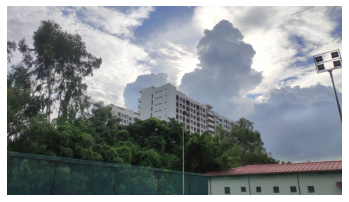

In [5]:
#Read the image
orginal = cv2.imread("iiitdm.jpg")
orginal = cv2.cvtColor(orginal, cv2.COLOR_BGR2RGB)
plt.imshow(orginal)
plt.axis('off')
plt.show()

In [ ]:
"""Syntax: cv2.cvtColor(src, code[, dst[, dstCn]])

Parameters:
src: It is the image whose color space is to be changed.
code: It is the color space conversion code.
dst: It is the output image of the same size and depth as src image. It is an optional parameter.
dstCn: It is the number of channels in the destination image. If the parameter is 0 then the number of the channels is derived automatically from src and code. It is an optional parameter.

Return Value: It returns an image."""


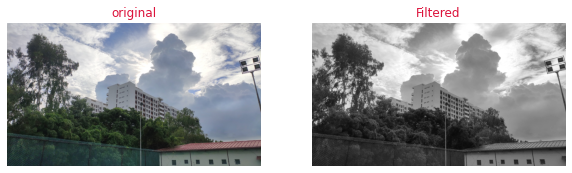

In [6]:
#greyscale filter
def greyscale(img):
    greyscale = cv2.cvtColor(orginal, cv2.COLOR_RGB2GRAY)
    return greyscale

#making the grayscale img
greyscale_filter = greyscale(orginal)

# plotting the outputs...
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)

plt.axis('off')
plt.imshow(orginal)
plt.title('original' , color='crimson', fontsize=12)

plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(greyscale_filter, cmap='gray')
plt.title('Filtered' , color='crimson', fontsize=12)

plt.show()

In [ ]:
"""	cv.convertScaleAbs(	src[, dst[, alpha[, beta]]]	) ->	dst
    On each element of the input array, the function convertScaleAbs performs three operations sequentially: 
    scaling, taking an absolute value, conversion to an unsigned 8-bit type:

    dst(I)=saturate\_cast<uchar>(|src(I)∗alpha+beta|)
-------------------------------------------------------------------------------------------------------------------------------    
    Parameters
    src	input array.
    dst	output array.
    alpha	optional scale factor.
    beta	optional delta added to the scaled values.
-------------------------------------------------------------------------------------------------------------------------------    
    alpha 1  beta 0      --> no change  
    0 < alpha < 1        --> lower contrast  
    alpha > 1            --> higher contrast  
    -127 < beta < +127   --> good range for brightness values
    

"""

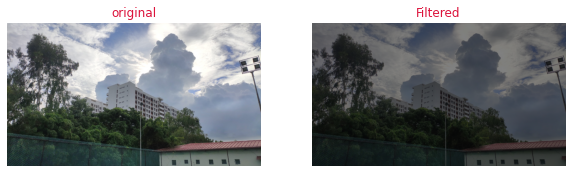

In [27]:
# brightness adjustment
def bright(img, beta_value ):
    img_bright = cv2.convertScaleAbs(img, beta=beta_value,alpha =0.5)
    return img_bright

# applying the filter
bright_filter = bright(orginal, 0)

# plotting the outputs...
plotGraph(orginal, bright_filter)


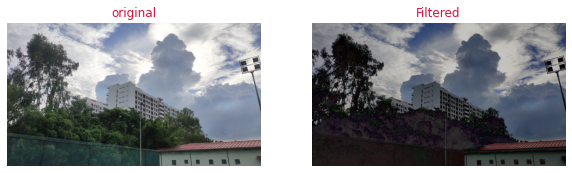

In [8]:
# applying the filter
bright_filter = bright(orginal, -60)

# plotting the outputs...
plotGraph(orginal, bright_filter)

In [ ]:
"""
Bitwise NOT operation on Image:
Inversion of input array elements. 
 

Syntax: cv2.bitwise_not(source, destination, mask)
Parameters: 
source: Input Image array(Single-channel, 8-bit or floating-point) 
dest: Output array (Similar to the dimensions and type of Input image array) 
mask: Operation mask, Input / output 8-bit single-channel mask""""

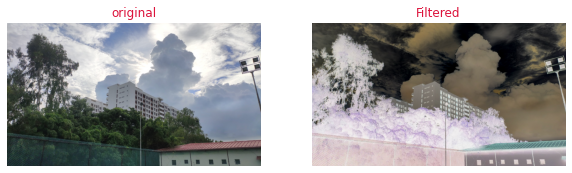

In [9]:
# invert filter
def invert(img):
    inv = cv2.bitwise_not(img)
    return inv


# applying the filter
invert_filter = invert(orginal)

# plotting the outputs...
plotGraph(orginal, invert_filter)

In [ ]:
"""
In Gaussian Blur operation, the image is convolved with a Gaussian filter instead of the box filter. 
The Gaussian filter is a low-pass filter that removes the high-frequency components are reduced
-------------------------------------------------------------------------------------------------------------------------------
GaussianBlur(src, dst, ksize, sigmaX)

This method accepts the following parameters −

src − A Mat object representing the source (input image) for this operation.

dst − A Mat object representing the destination (output image) for this operation.

ksize − A Size object representing the size of the kernel.

sigmaX − A variable of the type double representing the Gaussian kernel standard deviation in X direction.
-------------------------------------------------------------------------------------------------------------------------------
The Gaussian Blur Kernel like this when applied to an image through convolution, 
will apply a Gaussian Blurring effect to the resulting image.

1/16*[[1, 2, 1], [2, 4, 2], [1, 2, 1]]




"""

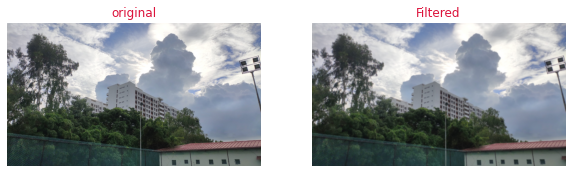

In [10]:
# blur filter
def blur(img):
    blr = cv2.GaussianBlur(img ,(5,5),cv2.BORDER_DEFAULT)
    return blr


# applying the filter
blur_filter = blur(orginal)

# plotting the outputs...
plotGraph(orginal, blur_filter)

In [12]:
#making Blur image

In [ ]:
"""
Syntax: cv2.Canny(image, T_lower, T_upper, aperture_size, L2Gradient)

Where: 

Image: Input image to which Canny filter will be applied
T_lower: Lower threshold value in Hysteresis Thresholding
T_upper: Upper threshold value in Hysteresis Thresholding
aperture_size: Aperture size of the Sobel filter.
L2Gradient: Boolean parameter used for more precision in calculating Edge Gradient.
-------------------------------------------------------------------------------------------------------------------------------
the main steps used in the Canny Edge detection algorithm using OpenCV-Python.

1. Noise Reduction

An edge detector is a high pass filter that enhances the high-frequency component and suppresses the low ones. 
Since both edges and noise are high-frequency components, the edge detectors tend to amplify the noise. 
To prevent this, we smooth the image with a low-pass filter. Canny uses a Gaussian filter for this.
-------------------------------------------------------------------------------------------------------------------------------
2. Finding Intensity Gradient of the Image
Next step is to find the edges using a Sobel operator. 
Sobel finds the gradients in both horizontal(Gx) and vertical(Gy) direction
-------------------------------------------------------------------------------------------------------------------------------
3. Non-Max Suppression
This is an edge thinning technique. 
In this, for each pixel, we check if it is a local maximum in its neighborhood in the direction of gradient or not. 
If it is a local maximum it is retained as an edge pixel, otherwise suppressed.
-------------------------------------------------------------------------------------------------------------------------------
But you can see that some edges are more bright than others.
To solve the problem of “which edges are really edges and which are not” Canny uses the Hysteresis thresholding. 
In this, we set two thresholds ‘High’ and ‘Low’.

Any edges with intensity greater than ‘High’ are the sure edges.
Any edges with intensity less than ‘Low’ are sure to be non-edges.
The edges between ‘High’ and ‘Low’ thresholds are classified as edges 
only if they are connected to a sure edge otherwise discarded.
-------------------------------------------------------------------------------------------------------------------------------

"""

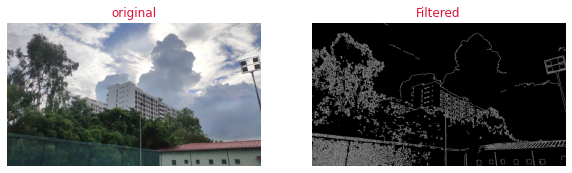

In [11]:
# Edge filter
def edge(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edg = cv2.Canny(gray,100,300)
    return edg
  

# applying the filter
edge_filter = edge(orginal)


# plotting the outputs...
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)

plt.axis('off')
plt.imshow(orginal)
plt.title('original' , color='crimson', fontsize=12)

plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(edge_filter, cmap='gray')
plt.title('Filtered' , color='crimson', fontsize=12)

plt.show()

In [ ]:
"""
filter2d(): In a nutshell, with this function, we can convolve an image with the kernel (typically a 2d matrix) to apply a filter on the images.

Syntax: filter2D (src, dst, ddepth, kernel)

Parameters:  

Src – The source image to apply the filter on.
Dst – Name of the output image after applying the filter
Ddepth – Depth of the output image [ -1 will give the output image depth as same as the input image]
Kernel – The 2d matrix we want the image to convolve with.

"""

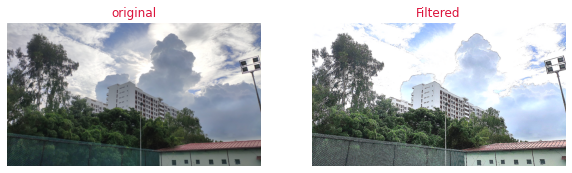

In [12]:
#sharp effect
def sharpen(img):
    kernel = np.array([[-1, -1, -1], [-1, 9.5, -1], [-1, -1, -1]])
    img_sharpen = cv2.filter2D(img, -1, kernel)
    return img_sharpen

# applying the filter
sharpen_filter = sharpen(orginal)

# plotting the outputs...
plotGraph(orginal, sharpen_filter)

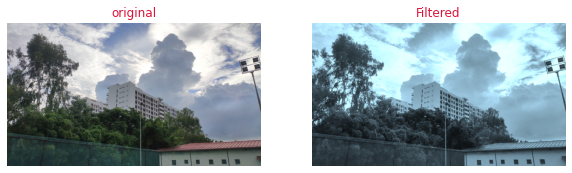

In [13]:
#sepia effect
def sepia(img):
    img_sepia = np.array(img, dtype=np.float64) # converting to float to prevent loss
    img_sepia = cv2.transform(img_sepia, np.matrix([[0.272, 0.534, 0.131],
                                    [0.349, 0.686, 0.168],
                                    [0.393, 0.769, 0.189]])) # multipying image with special sepia matrix
    img_sepia[np.where(img_sepia > 255)] = 255 # normalizing values greater than 255 to 255
    img_sepia = np.array(img_sepia, dtype=np.uint8)
    return img_sepia

# applying the filter
sepia_filter = sepia(orginal)

# plotting the outputs...
plotGraph(orginal, sepia_filter)

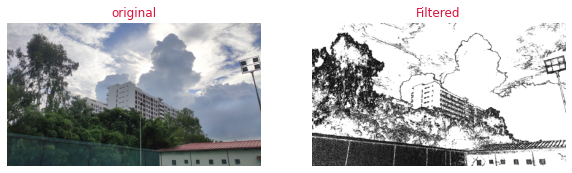

In [14]:
#grey pencil sketch effect
def pencil_sketch_grey(img):
    #inbuilt function to create sketch effect in colour and greyscale
    sk_gray, sk_color = cv2.pencilSketch(img, sigma_s=60, sigma_r=0.07, shade_factor=0.1) 
    return  sk_gray


# applying the filter
pencil_sketch_grey_filter = pencil_sketch_grey(orginal)

# plotting the outputs...
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)

plt.axis('off')
plt.imshow(orginal)
plt.title('original' , color='crimson', fontsize=12)

plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(pencil_sketch_grey_filter, cmap='gray')
plt.title('Filtered' , color='crimson', fontsize=12)

plt.show()

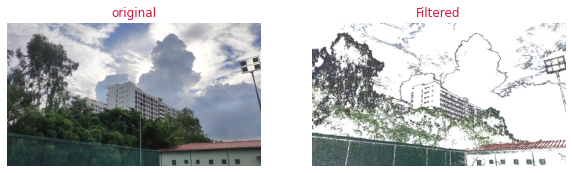

In [15]:
#colour pencil sketch effect
def pencil_sketch_col(img):
    #inbuilt function to create sketch effect in colour and greyscale
    sk_gray, sk_color = cv2.pencilSketch(img, sigma_s=60, sigma_r=0.07, shade_factor=0.1) 
    return  sk_color

#making the filter
pencil_sketch_col_filter = pencil_sketch_col(orginal)

# plotting the outputs...
plotGraph(orginal, pencil_sketch_col_filter)

In [16]:
#defining a function
def LookupTable(x, y):
  spline = UnivariateSpline(x, y)
  return spline(range(256))



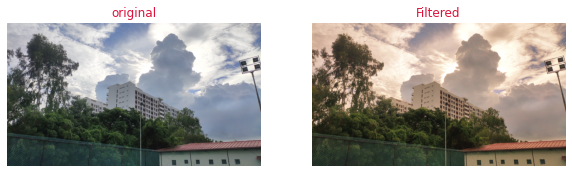

In [17]:
# summer effect
def Summer(img):
    increaseLookupTable = LookupTable([0, 64, 128, 256], [0, 80, 160, 256])
    decreaseLookupTable = LookupTable([0, 64, 128, 256], [0, 50, 100, 256])
    red_channel, green_channel,blue_channel  = cv2.split(img)
    red_channel = cv2.LUT(red_channel, increaseLookupTable).astype(np.uint8)
    blue_channel = cv2.LUT(blue_channel, decreaseLookupTable).astype(np.uint8)
    sum = cv2.merge((red_channel, green_channel, blue_channel ))
    
    return sum

#making the filter
summer_filter = Summer(orginal)

# plotting the outputs...
plotGraph(orginal, summer_filter)

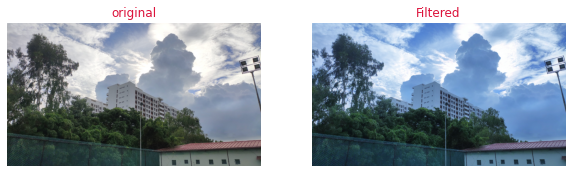

In [18]:
# winter effect
def Winter(img):
    increaseLookupTable = LookupTable([0, 64, 128, 256], [0, 80, 160, 256])
    decreaseLookupTable = LookupTable([0, 64, 128, 256], [0, 50, 100, 256])
    red_channel, green_channel,blue_channel = cv2.split(img)
    red_channel = cv2.LUT(red_channel, decreaseLookupTable).astype(np.uint8)
    blue_channel = cv2.LUT(blue_channel, increaseLookupTable).astype(np.uint8)
    win = cv2.merge((red_channel, green_channel, blue_channel))
    
    return win


#making the winter
winter_filter = Winter(orginal)

# plotting the outputs...
plotGraph(orginal, winter_filter)

In [ ]:
"""
>>First we need to convert the image into greyscale. 
>>Then, the cv2.medianBlur function is used to reduce the noise of the greyscale image.
>>Then we can detect the edge using cv2.adaptiveThreshold() function.

-------------------------------------------------------------------------------------------------------------------------------
>>A key difference between photographs and sketches/ cartoons is the number of distinct colours.
>>So, a method named colour quantization is used. This will reduce the number of colours in the photo.  K Means clustering 
  algorithm is used to perform the process. The “k” value is adjusted depending on the number of colours we need.
>>After the colour quantization is done, we can now reduce the noise in the image.A bilateral filter can be used for this task
>>Now we do the final cartoon effect

In Simple Thresholding, a global value of threshold was used which remained constant throughout. 
So, a constant threshold value won’t help in the case of variable lighting conditions in different areas.

Adaptive thresholding, which considers small neighbors of pixels and then finds a optimal threshold value T for each neighbor. 
This method allows us to handle cases where there may be dramatic ranges of pixel intensities and 
the optimal value of T may change for different parts of the image.

threshold(src, dst, thresh, maxval, type)

Syntax: cv2.adaptiveThreshold(source, maxVal, adaptiveMethod, thresholdType, blocksize, constant)

Parameters:
-> source: Input Image array(Single-channel, 8-bit or floating-point)
-> maxVal: Maximum value that can be assigned to a pixel.
-> adaptiveMethod: Adaptive method decides how threshold value is calculated.

cv2.ADAPTIVE_THRESH_MEAN_C: Threshold Value = (Mean of the neighbourhood area values – constant value). 

cv2.ADAPTIVE_THRESH_GAUSSIAN_C: Threshold Value = (Gaussian-weighted sum of the neighbourhood values – constant value). 


-> thresholdType: The type of thresholding to be applied.
-> blockSize: Size of a pixel neighborhood that is used to calculate a threshold value.
-> constant: A constant value that is subtracted from the mean or weighted sum of the neighbourhood pixels.

-------------------------------------------------------------------------------------------------------------------------------

K-Means is an unsupervised algorithm from the machine learning approach. This algorithm tries to make clusters of input data 
features and is one of the several simple and spontaneous clustering algorithms, amongst various others.

The input data objects need to be allocated to separate clusters based on the relationship among them. 

K-means clustering algorithms assign similar data points into groups, 
where the K value represents the size of the grouping and granularity.
-------------------------------------------------------------------------------------------------------------------------------

A bilateral filter is a non-linear, edge-preserving, and noise-reducing smoothing filter for images. 
It replaces the intensity of each pixel with a weighted average of intensity values from nearby pixels.

"""

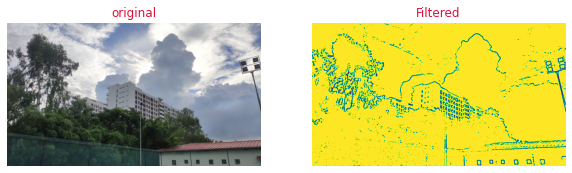

In [19]:
#CARTOON IMAGES

def edge_mask(img, line_size, blur_value):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)
  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
  return edges

line_size = 7
blur_value = 7

#making the filter
edges = edge_mask(orginal, line_size, blur_value)

# plotting the outputs...
plotGraph(orginal, edges)

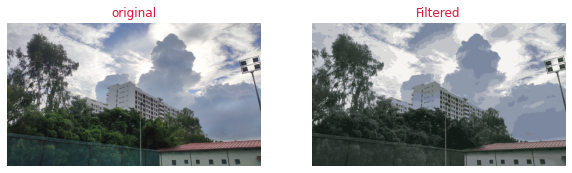

In [20]:
#colour quantization
#k value determines the number of colours in the image
total_color = 16
k=total_color

# Transform the image
data = np.float32(orginal).reshape((-1, 3))

# Determine criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

# Implementing K-Means
ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
result = center[label.flatten()]
result = result.reshape(orginal.shape)

# plotting the outputs...
plotGraph(orginal, result)

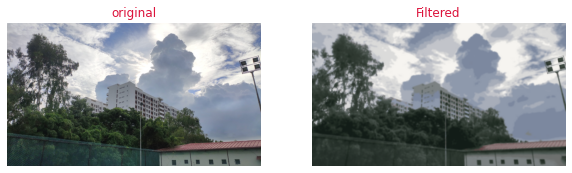

In [21]:
blurred = cv2.bilateralFilter(result, d=10, sigmaColor=250,sigmaSpace=250)

# plotting the outputs...
plotGraph(orginal, blurred)



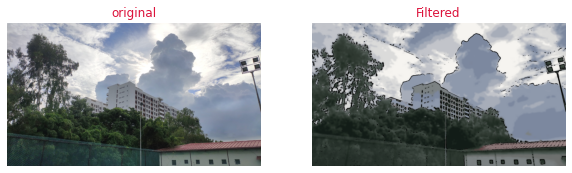

In [22]:
#blurred and edges
cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)

# plotting the outputs...
plotGraph(orginal, cartoon)